# Analyzing results of one experiment.
### Finding std of std and mean
### plotting the predictions
### plotting kde
### KS test

## imports

In [1]:
# Third-party imports
%matplotlib inline
import json
import matplotlib.pyplot as plt


In [2]:
from src.RQ1_forecast import *

In [3]:
num_samples = 100

In [4]:
data_address1 = '/home/dev/deepts/experiments/deepstate/electricity/1B'

# Forecast section

## Load data

In [5]:
# read the forcast file
forcast_list1 = read_csv_result('forecasts.csv', data_address1)

101it [00:00, 33597.01it/s]
100%|###########| 100/100 [04:15<00:00,  2.56s/it]


In [6]:
len(forcast_list1)

100

In [7]:
# sort the forcast lists based on their original time series
sorted_forcast_list1 = get_sorted_csv(forcast_list1)

In [8]:
sorted_forcast_list1[0]

,fold_num,series_number,timestamp,target,sample0,sample1,sample2,sample3,sample4,sample5,...,sample94,sample95,sample96,sample97,sample98,sample99,train_series_number,mean,std,normal_std
0,1,0,2014-05-26 20:00:00,9.0,41.540090,-40.385048,30.691260,9.006823,31.792550,22.003620,...,32.716415,23.354840,5.527109,35.426125,-20.549896,21.345095,0,17.104495,23.893369,0.188304
1,1,0,2014-05-26 21:00:00,10.0,36.602287,-17.144062,-4.044796,-55.093716,21.574799,21.728363,...,-19.639317,23.180315,72.349740,54.937347,43.384030,23.533450,0,16.811973,22.406503,0.169954
2,1,0,2014-05-26 22:00:00,22.0,0.264456,23.827255,-5.304296,11.981367,42.672955,38.439945,...,16.410484,35.116300,18.685950,24.460917,12.306867,20.682020,0,12.932603,21.475618,0.235253
3,1,0,2014-05-26 23:00:00,20.0,-9.424163,30.325008,4.385783,4.991257,18.864580,22.075394,...,22.649805,39.364660,20.717718,26.438885,-2.644798,-8.561808,0,12.399058,23.600383,0.185365
4,1,0,2014-05-27 00:00:00,13.0,38.032238,27.026682,17.557960,3.056732,30.437689,54.201576,...,41.855312,23.774435,-1.063927,56.654640,13.903592,10.233876,0,30.148188,20.617838,0.200421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53923,1,2246,2014-06-02 15:00:00,4209.0,2974.383300,3478.546600,2846.992000,3045.078900,3219.726300,3575.544200,...,2636.788800,3046.457000,2881.152800,3709.780800,3654.946000,3035.252200,320,3169.311916,340.519866,0.205607
53924,1,2246,2014-06-02 16:00:00,4120.0,3371.373500,3555.352300,2751.528800,3127.619100,3364.734000,3639.869400,...,2949.178700,3213.776000,2981.021000,3796.166700,3906.156500,3008.152000,320,3296.153914,324.816007,0.194404
53925,1,2246,2014-06-02 17:00:00,3951.0,3491.506600,3461.182100,2749.560500,3053.869400,3616.911100,3814.522500,...,2958.117200,3058.469700,3074.634800,4027.404800,3714.413800,3316.903000,320,3370.020462,337.130612,0.228577
53926,1,2246,2014-06-02 18:00:00,3907.0,3249.894000,3339.242000,2675.746600,2845.294000,3120.593300,3738.240200,...,2841.467000,3124.424800,3089.995800,4000.955300,3994.829300,3231.714800,320,3290.469114,363.244870,0.221041


## get each time series individually

In [9]:
target_forcast_series = get_forcast_target(forcast_list1)

In [10]:
# this dataframe is just one time series
ts_number = 0
ts_list1 = get_ts_list(sorted_forcast_list1, ts_number)

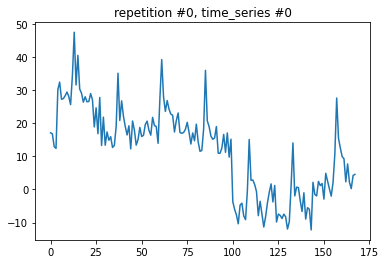

In [11]:
# plot mean of only one time series
rep_no = 0
plt.title(f'repetition #{rep_no}, time_series #{ts_number}')
ts_list1[rep_no]['mean'].plot()

## plot the kde for experiments

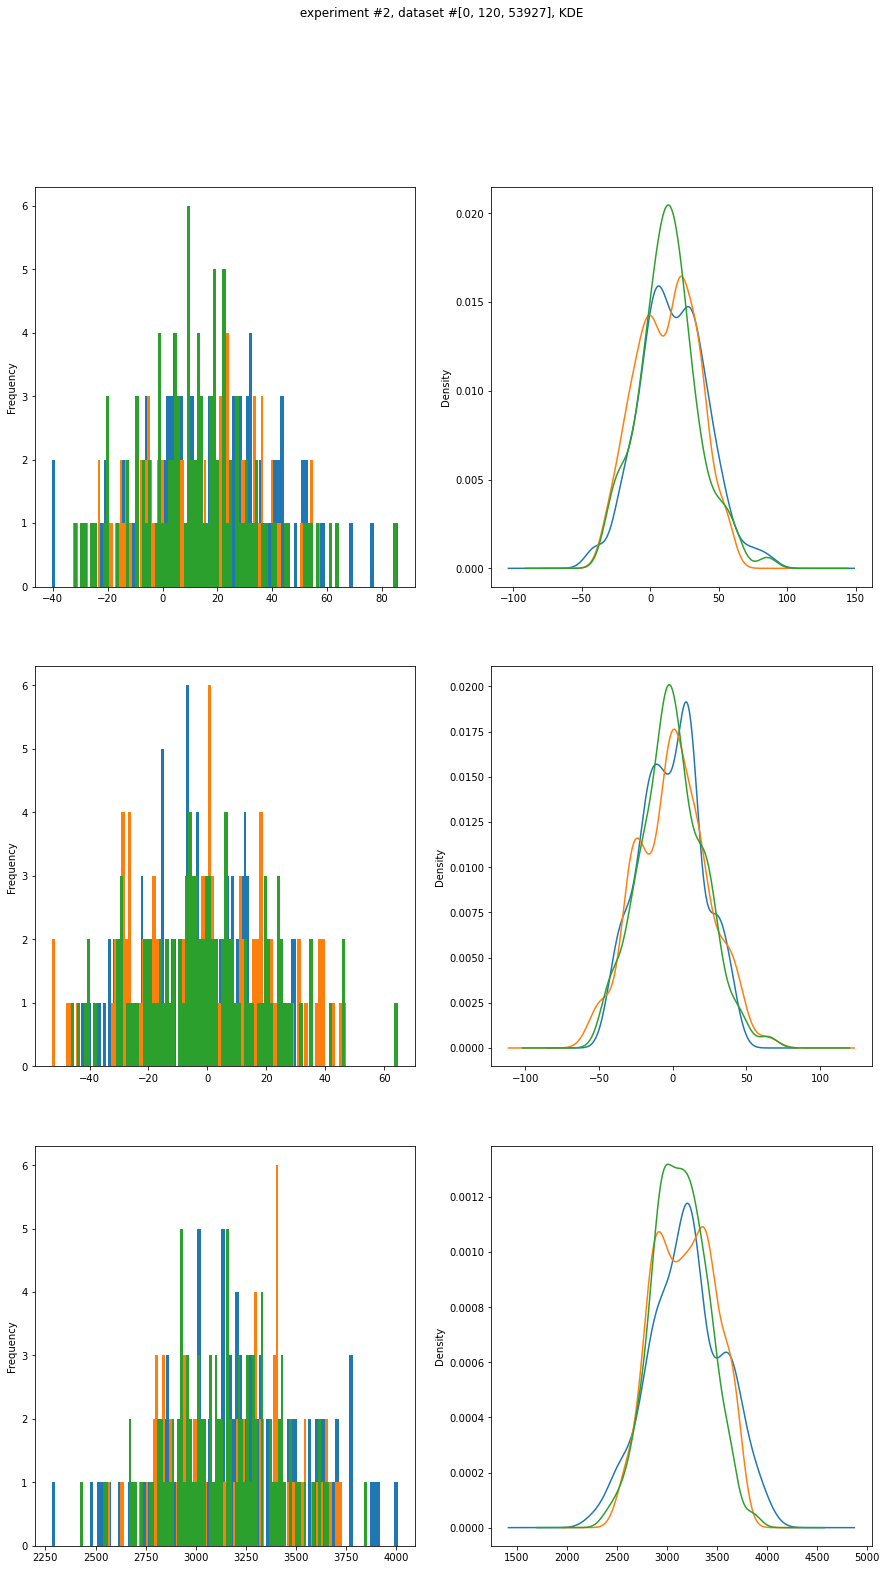

In [12]:
data_n = [0, 120, 53927]
max_shape = 3 # number of experiments that are going to be plotted
plot_kde_hist(data_n, max_shape, sorted_forcast_list1)

## std of mean and std over time

In [13]:
## calculate the std over different repetitions
forecast_distrib_df1 = get_forcast_distrib(forcast_list1)
# convert the list of dataframes to a 3d np
forecast_np = get_np_forcast(forecast_distrib_df1)
# get std over different experiments
forecast_std_np = get_std_np(forecast_np, forecast_distrib_df1)
df_std_forecast = pd.DataFrame(forecast_std_np)
df_std_forecast.rename(index={0:'mean',1:'sigma'}, inplace=True)

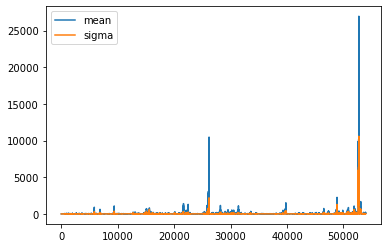

In [14]:
df_std_forecast.T.plot()

## plot samples of experimets

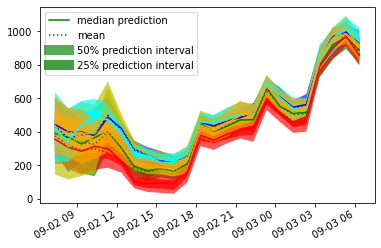

In [15]:
sample_forcast_list1 = get_forcast_samples(forcast_list1)
tmp_n = 53736
plot_forscast_same(sample_forcast_list1, tmp_n, lim=5)

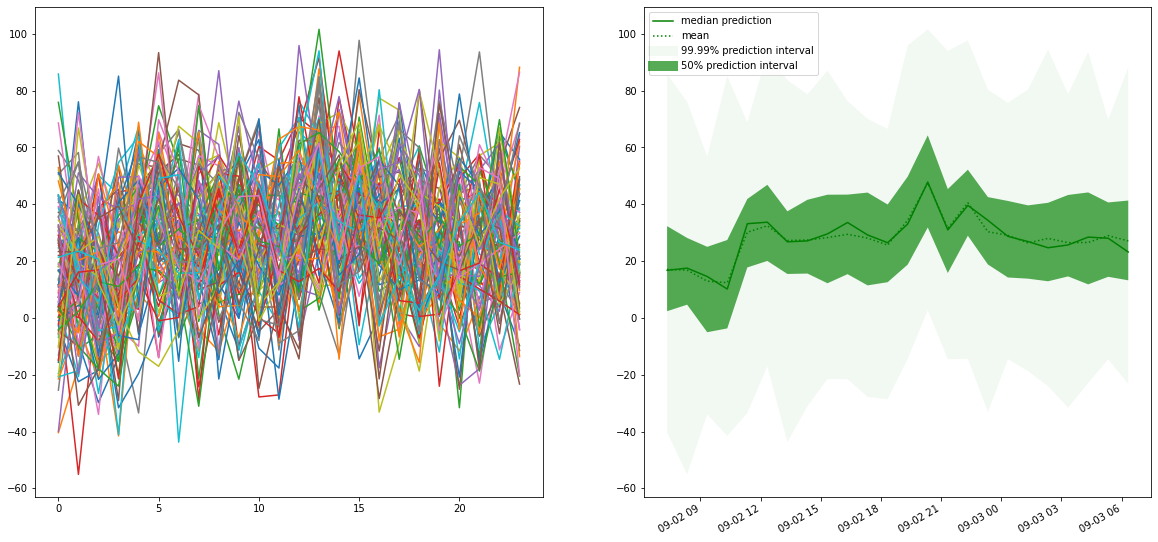

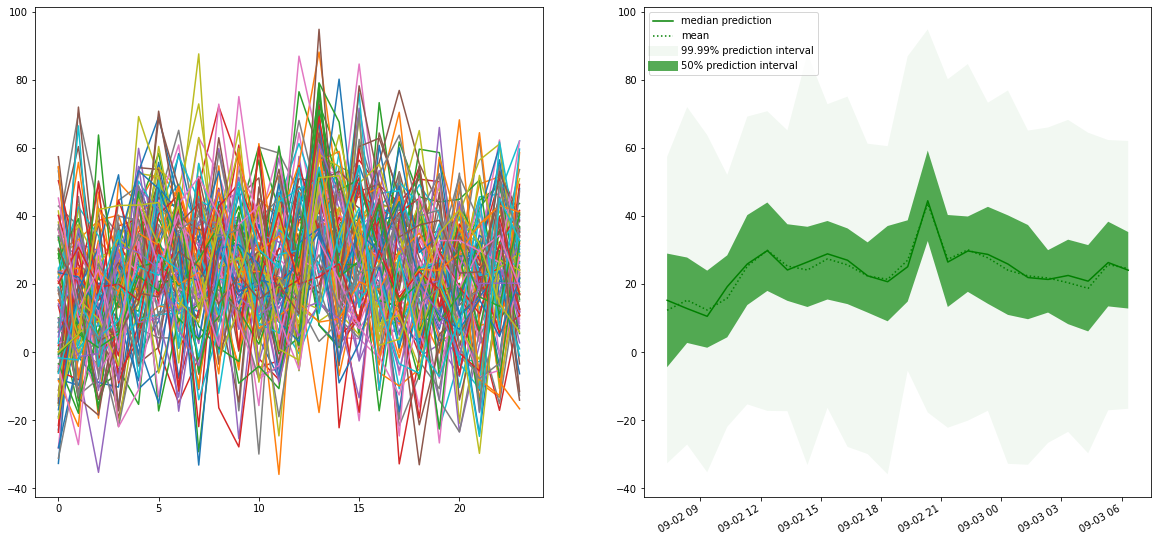

In [16]:
time_point_no = 0
rep_lim = 2
save_plot_exp(sample_forcast_list1, rep_lim, time_point_no)

## KS Test

In [17]:
# we set the datapoint to 4
data_n_el = 4

# make some samples to visualize
exp_n = 0
sample0 = sample_forcast_list1[exp_n][data_n_el]

exp_n = 90
sample90 = sample_forcast_list1[exp_n][data_n_el]

exp_n = 91
sample91 = sample_forcast_list1[exp_n][data_n_el]

(0.0, 40.0)

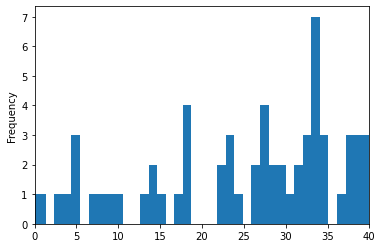

In [18]:
# plot the samples
sample0.plot.hist(bins = 100)
plt.xlim([0,40])

(0.0, 40.0)

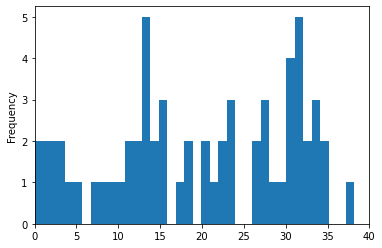

In [19]:
sample90.plot.hist(bins = 100)
plt.xlim([0,40])

(0.0, 40.0)

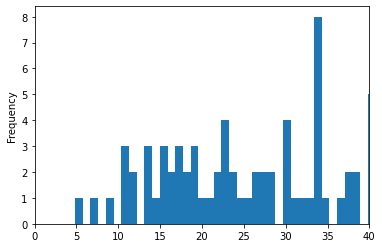

In [20]:
sample91.plot.hist(bins = 100)
plt.xlim([0,40])

In [21]:
# calculate the table of ks tests for each time points
data_point = 1000
ks_table = get_ks_tmp(sample_forcast_list1, data_point)

In [22]:
ks_table

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,True,True,True,True,True,True,True,True,False,False,...,False,True,True,False,False,False,True,True,False,False
1,False,True,False,True,True,True,True,True,False,False,...,True,True,True,False,True,True,True,True,False,False
2,False,False,True,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,True,True,True,True,True,False,True,...,True,True,True,False,True,True,True,True,False,True
4,False,False,False,False,True,True,True,True,False,False,...,True,True,True,False,True,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,True
96,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
97,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
98,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True


In [23]:
# calculate the proportion of true/all for upper triangle of the table
portion_ks_table(ks_table)

0.5595959595959596

As it is apparant for tmp=12 the ks test gave us good results. however, for tmp=1000 it is not the case

In [28]:
# now we can loop through all 53000 time points and output the results
# try it for first 1000 points
tmp_lim = 100

portion_array = np.zeros(tmp_lim)

for data_point in range(tmp_lim):
    ks_table = get_ks_tmp(sample_forcast_list1, data_point)  
    portion_array[data_point]= portion_ks_table(ks_table)
    print(data_point)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


Text(0.5, 1.0, 'first day of time series #0')

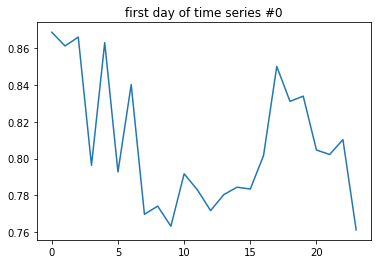

In [32]:
i = 0
plt.plot(portion_array[i*168: (i)*168 + 24])
plt.title(f'first day of time series #{i}')

Text(0.5, 1.0, 'all time series')

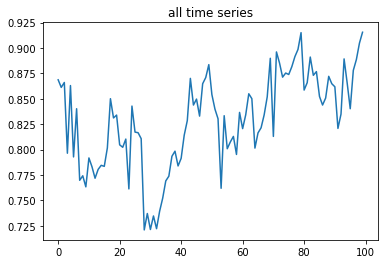

In [31]:
plt.plot(portion_array)
plt.title('all time series')

In [33]:
# initialize the numpy array
train_series_number = 100
prediction_length = 24
ks_array = np.zeros((train_series_number, prediction_length))


# we want to calculate the ks test for the first prediction
# i from 0 to #ts-1:
#   j from 168*i to 168*i+24:
for i in range(train_series_number):
    for j, data_point in enumerate(range(168*i, 168*i+24)):
        ks_table = get_ks_tmp(sample_forcast_list1, data_point)  
        ks_array[i,j] = portion_ks_table(ks_table)
    print(f'ts {i}')

ks_array

ts 0
ts 1
ts 2
ts 3
ts 4
ts 5
ts 6
ts 7
ts 8
ts 9
ts 10
ts 11
ts 12
ts 13
ts 14
ts 15
ts 16
ts 17
ts 18
ts 19
ts 20
ts 21
ts 22
ts 23
ts 24
ts 25
ts 26
ts 27
ts 28
ts 29
ts 30
ts 31
ts 32
ts 33
ts 34
ts 35
ts 36
ts 37
ts 38
ts 39
ts 40
ts 41
ts 42
ts 43
ts 44
ts 45
ts 46
ts 47
ts 48
ts 49
ts 50
ts 51
ts 52
ts 53
ts 54
ts 55
ts 56
ts 57
ts 58
ts 59
ts 60
ts 61
ts 62
ts 63
ts 64
ts 65
ts 66
ts 67
ts 68
ts 69
ts 70
ts 71
ts 72
ts 73
ts 74
ts 75
ts 76
ts 77
ts 78
ts 79
ts 80
ts 81
ts 82
ts 83
ts 84
ts 85
ts 86
ts 87
ts 88
ts 89
ts 90
ts 91
ts 92
ts 93
ts 94
ts 95
ts 96
ts 97
ts 98
ts 99


array([[0.86868687, 0.86121212, 0.86606061, ..., 0.80222222, 0.81030303,
        0.76121212],
       [0.71151515, 0.66181818, 0.60222222, ..., 0.82808081, 0.83737374,
        0.8440404 ],
       [0.4630303 , 0.5830303 , 0.59777778, ..., 0.53494949, 0.48565657,
        0.56161616],
       ...,
       [0.75373737, 0.65494949, 0.55656566, ..., 0.82606061, 0.87070707,
        0.93151515],
       [0.52929293, 0.44242424, 0.41292929, ..., 0.7020202 , 0.72080808,
        0.71010101],
       [0.36767677, 0.26121212, 0.28848485, ..., 0.38505051, 0.51333333,
        0.64080808]])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f92c27975d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f92c279d090>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f92c2806fd0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f92c279db50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f92c27a60d0>,
 'means': []}

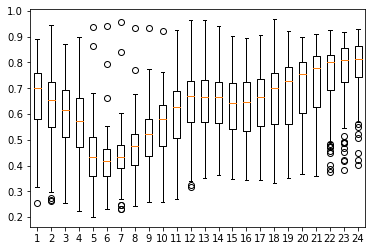

In [34]:
plt.boxplot(ks_array)

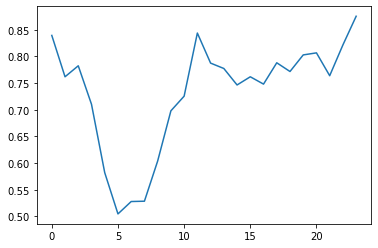

In [47]:
i = 6
plt.plot(ks_array[i])

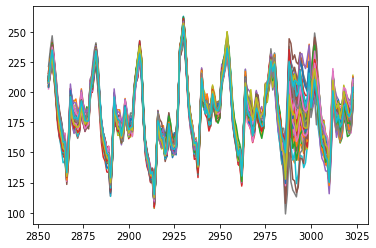

In [50]:
# this dataframe is just one time series
ts_number = 17
ts_list1 = get_ts_list(sorted_forcast_list1, ts_number)
# ts_list2 = get_ts_list(sorted_forcast_list2, ts_number)

# plot mean of only one time series
for rep_no in range(100):
    ts_list1[rep_no]['mean'].plot()
# ts_list2[rep_no]['mean'].plot()

In [51]:
# initialize the numpy array
train_series_number = 100
prediction_length = 24
ks_array7 = np.zeros((train_series_number, prediction_length))


# we want to calculate the ks test for the first prediction
# i from 0 to #ts-1:
#   j from 168*i to 168*i+24:
for i in range(train_series_number):
    for j, data_point in enumerate(range(168*i+144, 168*i+168)):
        ks_table = get_ks_tmp(sample_forcast_list1, data_point)  
        ks_array7[i,j] = portion_ks_table(ks_table)
    print(f'ts {i}')

ks_array7

ts 0
ts 1
ts 2
ts 3
ts 4
ts 5
ts 6
ts 7
ts 8
ts 9
ts 10
ts 11
ts 12
ts 13
ts 14
ts 15
ts 16
ts 17
ts 18
ts 19
ts 20
ts 21
ts 22
ts 23
ts 24
ts 25
ts 26
ts 27
ts 28
ts 29
ts 30
ts 31
ts 32
ts 33
ts 34
ts 35
ts 36
ts 37
ts 38
ts 39
ts 40
ts 41
ts 42
ts 43
ts 44
ts 45
ts 46
ts 47
ts 48
ts 49
ts 50
ts 51
ts 52
ts 53
ts 54
ts 55
ts 56
ts 57
ts 58
ts 59
ts 60
ts 61
ts 62
ts 63
ts 64
ts 65
ts 66
ts 67
ts 68
ts 69
ts 70
ts 71
ts 72
ts 73
ts 74
ts 75
ts 76
ts 77
ts 78
ts 79
ts 80
ts 81
ts 82
ts 83
ts 84
ts 85
ts 86
ts 87
ts 88
ts 89
ts 90
ts 91
ts 92
ts 93
ts 94
ts 95
ts 96
ts 97
ts 98
ts 99


array([[0.83313131, 0.81434343, 0.81494949, ..., 0.80424242, 0.80808081,
        0.77515152],
       [0.34666667, 0.3220202 , 0.29676768, ..., 0.5979798 , 0.63393939,
        0.63636364],
       [0.48383838, 0.5220202 , 0.50686869, ..., 0.49636364, 0.44787879,
        0.53979798],
       ...,
       [0.45171717, 0.38969697, 0.39030303, ..., 0.67171717, 0.6830303 ,
        0.69515152],
       [0.24424242, 0.20484848, 0.1969697 , ..., 0.32141414, 0.33090909,
        0.34262626],
       [0.28020202, 0.21151515, 0.21070707, ..., 0.31838384, 0.37131313,
        0.42383838]])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f92a7a554d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f92a7a2ca50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f92a7a52510>,
 'medians': [<matplotlib.lines.Line2D at 0x7f92a7a68590>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f92a7aa9fd0>,
 'means': []}

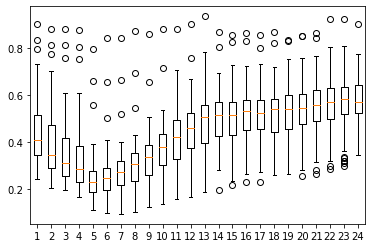

In [52]:
plt.boxplot(ks_array7)

In [53]:
# initialize the numpy array
train_series_number = 100
prediction_length = 24
ks_array6 = np.zeros((train_series_number, prediction_length))


# we want to calculate the ks test for the first prediction
# i from 0 to #ts-1:
#   j from 168*i to 168*i+24:
for i in range(train_series_number):
    for j, data_point in enumerate(range(168*i+120, 168*i+144)):
        ks_table = get_ks_tmp(sample_forcast_list1, data_point)  
        ks_array6[i,j] = portion_ks_table(ks_table)
    print(f'ts {i}')

ts 0
ts 1
ts 2
ts 3
ts 4
ts 5
ts 6
ts 7
ts 8
ts 9
ts 10
ts 11
ts 12
ts 13
ts 14
ts 15
ts 16
ts 17
ts 18
ts 19
ts 20
ts 21
ts 22
ts 23
ts 24
ts 25
ts 26
ts 27
ts 28
ts 29
ts 30
ts 31
ts 32
ts 33
ts 34
ts 35
ts 36
ts 37
ts 38
ts 39
ts 40
ts 41
ts 42
ts 43
ts 44
ts 45
ts 46
ts 47
ts 48
ts 49
ts 50
ts 51
ts 52
ts 53
ts 54
ts 55
ts 56
ts 57
ts 58
ts 59
ts 60
ts 61
ts 62
ts 63
ts 64
ts 65
ts 66
ts 67
ts 68
ts 69
ts 70
ts 71
ts 72
ts 73
ts 74
ts 75
ts 76
ts 77
ts 78
ts 79
ts 80
ts 81
ts 82
ts 83
ts 84
ts 85
ts 86
ts 87
ts 88
ts 89
ts 90
ts 91
ts 92
ts 93
ts 94
ts 95
ts 96
ts 97
ts 98
ts 99


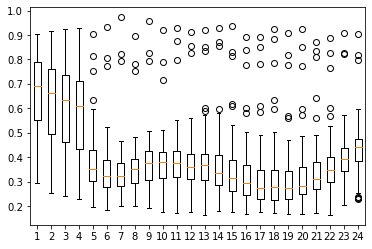

In [55]:
plt.boxplot(ks_array6)
plt.show()